<a href="https://colab.research.google.com/github/cacaalqorina/Membuat_Model_NLP_dengan_TensorFlow/blob/main/Membuat_Model_NLP_dengan_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Annisa Alqorina
22 Tahun
FreshGraduate S1 FISIKA

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('inshort_news_data-1.csv')

In [ ]:
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [ ]:
df.shape

(4817, 4)

In [ ]:
category = pd.get_dummies(df.news_category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='news_category')
df_baru

,Unnamed: 0,news_headline,news_article,automobile,entertainment,politics,science,sports,technology,world
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,0,0,0,0,0,1,0
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,0,0,0,0,0,1,0
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",0,0,0,0,0,1,0
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,0,0,0,0,0,1,0
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4812,4812,AstraZeneca to test combining Oxford vaccine w...,"AstraZeneca, which is developing a coronavirus...",0,0,0,1,0,0,0
4813,4813,"Humanity will face 60°C temperatures in 2050s,...",As many as two billion people will face 60°C t...,0,0,0,1,0,0,0
4814,4814,Human-made objects to outweigh living things b...,Scientists have said that the weight of human-...,0,0,0,1,0,0,0
4815,4815,"IUCN lists 31 species as 'Extinct', European B...",The IUCN released an update of its Red List of...,0,0,0,1,0,0,0


In [ ]:
df = df.drop(['Unnamed: 0', 'news_headline'], axis=1)
df.head()

,news_article,news_category
0,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams will stop working on Internet ...,technology
2,"China, in response to reports of US adding Chi...",technology
3,The global smartphone sales in the third quart...,technology
4,The European Union (EU) is hoping that US Pres...,technology


In [ ]:
article = df_baru['news_article'].values
label = df_baru[['automobile', 'entertainment', 'politics', 'science', 'sports','technology','world' ]].values

In [ ]:
from sklearn.model_selection import train_test_split
article_latih, article_test, label_latih, label_test = train_test_split(article, label, test_size = 0.2 )

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(article_latih) 
tokenizer.fit_on_texts(article_test)
 
sekuens_latih = tokenizer.texts_to_sequences(article_latih)
sekuens_test = tokenizer.texts_to_sequences(article_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 117,767
Trainable params: 117,767
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.90):
      print('\nakurasi telah mencapai 90%')
      self.model.stop_training = True

callbacks = myCallback()

num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
121/121 - 9s - loss: 1.6960 - accuracy: 0.2707 - val_loss: 1.3090 - val_accuracy: 0.4544 - 9s/epoch - 74ms/step
Epoch 2/30
121/121 - 5s - loss: 1.0696 - accuracy: 0.4952 - val_loss: 0.8985 - val_accuracy: 0.5705 - 5s/epoch - 39ms/step
Epoch 3/30
121/121 - 6s - loss: 0.6633 - accuracy: 0.7142 - val_loss: 0.5604 - val_accuracy: 0.8060 - 6s/epoch - 46ms/step
Epoch 4/30
121/121 - 5s - loss: 0.3990 - accuracy: 0.8591 - val_loss: 0.4732 - val_accuracy: 0.8568 - 5s/epoch - 39ms/step
Epoch 5/30
121/121 - 5s - loss: 0.2832 - accuracy: 0.9118 - val_loss: 0.4450 - val_accuracy: 0.8776 - 5s/epoch - 40ms/step
Epoch 6/30

akurasi telah mencapai 90%
121/121 - 5s - loss: 0.2142 - accuracy: 0.9356 - val_loss: 0.3693 - val_accuracy: 0.9108 - 5s/epoch - 39ms/step


In [ ]:
import matplotlib.pyplot as plt

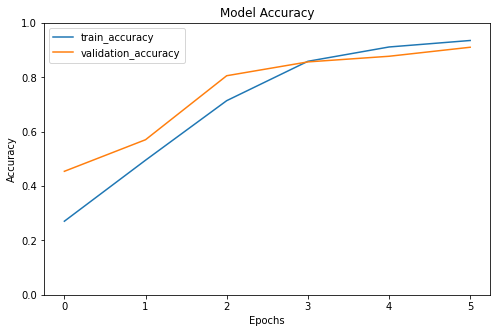

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0, ymax=1)
plt.show()

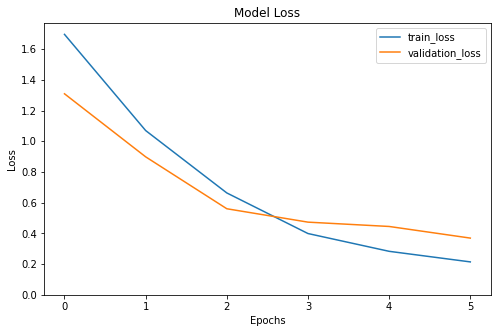

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(ymin=0)
plt.show()